In [156]:
import sys

# for saving the pipeline
import joblib

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from pycaret.clustering import ClusteringExperiment

In [157]:
## importar el script preprocessors
sys.path.append('./preprocessors.py')

import preprocessors as pp

In [158]:
facebook_data = pd.read_csv('../data/01_raw/Facebook_Live.csv')

In [159]:
facebook_data 

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
7041,1050855161656896_1061863470556065,photo,9/24/2016 2:58,89,0,0,89,0,0,0,0,0
7042,1050855161656896_1061334757275603,photo,9/23/2016 11:19,16,0,0,14,1,0,1,0,0
7043,1050855161656896_1060126464063099,photo,9/21/2016 23:03,2,0,0,1,1,0,0,0,0
7044,1050855161656896_1058663487542730,photo,9/20/2016 0:43,351,12,22,349,2,0,0,0,0


In [160]:
X_train, X_test = train_test_split(facebook_data,
    test_size=0.1, # portion of dataset to allocate to test set
    random_state=0, # we are setting the seed here
)

In [162]:
X_train.to_csv("../data/02_model_input/train.csv")
X_test.to_csv("../data/02_model_input/test.csv")

# Configuration

In [163]:
DUPLICATED_VARS = ["status_id"]
NUM_VARS = ["num_reactions", "num_comments", "num_shares", "num_likes", "num_loves", "num_wows", "num_hahas", "num_sads", "num_angrys"]
DATE_COL = ["status_published"]
ID_COL = ["status_id"]
CAT_VARS = ["status_type", 'day', 'weekday', 'month', 'event']
DROP_VARS = ["status_id", "status_published"]

In [164]:
facebook_pipe = Pipeline([
    ('drop_duplicates', pp.DropDuplicates(DUPLICATED_VARS)),
    ('date_transformer', pp.DateTransformer(DATE_COL)),
    ('event_extraction', pp.IDTransformer(ID_COL)),
    ('cat_encoder',pp.CategoricalEncoder(CAT_VARS)),
    ('drop_features', pp.DropFeatures(DROP_VARS)),
    ('scaler', pp.Scaler()),
])

In [165]:
full_data = facebook_pipe.fit_transform(X_train)

In [166]:
full_data

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,hour,...,month_12,event_1050855161656896,event_117059915488335,event_134115277150304,event_146481362756646,event_246675545449582,event_614855718638584,event_725980084255106,event_819700534875473,event_848451358648417
0,0.050531,0.007194,0.022780,0.049045,0.006088,0.010791,0.000000,0.0,0.0,0.086957,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.003185,0.000000,0.000000,0.003185,0.000000,0.000000,0.000000,0.0,0.0,0.304348,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.000212,0.000000,0.000000,0.000212,0.000000,0.000000,0.000000,0.0,0.0,0.956522,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.036943,0.015817,0.042348,0.032909,0.027397,0.000000,0.006369,0.0,0.0,0.260870,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.020170,0.000143,0.000584,0.019108,0.003044,0.010791,0.000000,0.0,0.0,0.956522,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6292,0.009130,0.000048,0.000584,0.008917,0.001522,0.000000,0.000000,0.0,0.0,0.043478,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
6293,0.015711,0.000238,0.000292,0.014225,0.004566,0.014388,0.000000,0.0,0.0,0.130435,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
6294,0.023142,0.000048,0.000000,0.023142,0.000000,0.000000,0.000000,0.0,0.0,0.913043,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
6295,0.006157,0.000476,0.000584,0.006157,0.000000,0.000000,0.000000,0.0,0.0,1.000000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [167]:
selector = pp.FeatureSelector(full_data)
selected_features_df = selector.tree_based_feature_importance(n_select_features=10)
selected_features_df

,num_angrys,num_sads,num_hahas,num_wows,num_loves,num_shares,hour,num_comments,num_likes,num_reactions
0,0.0,0.0,0.000000,0.010791,0.006088,0.022780,0.086957,0.007194,0.049045,0.050531
1,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.304348,0.000000,0.003185,0.003185
2,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.956522,0.000000,0.000212,0.000212
3,0.0,0.0,0.006369,0.000000,0.027397,0.042348,0.260870,0.015817,0.032909,0.036943
4,0.0,0.0,0.000000,0.010791,0.003044,0.000584,0.956522,0.000143,0.019108,0.020170
...,...,...,...,...,...,...,...,...,...,...
6292,0.0,0.0,0.000000,0.000000,0.001522,0.000584,0.043478,0.000048,0.008917,0.009130
6293,0.0,0.0,0.000000,0.014388,0.004566,0.000292,0.130435,0.000238,0.014225,0.015711
6294,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.913043,0.000048,0.023142,0.023142
6295,0.0,0.0,0.000000,0.000000,0.000000,0.000584,1.000000,0.000476,0.006157,0.006157


In [168]:
selected_features_df.columns

Index(['num_angrys', 'num_sads', 'num_hahas', 'num_wows', 'num_loves',
       'num_shares', 'hour', 'num_comments', 'num_likes', 'num_reactions'],
      dtype='object')

# PyCaret

In [179]:
all_cats = list(selected_features_df.columns) + ['status_type_photo', 'status_type_link', 'status_type_status', 'status_type_video']

In [180]:
clustering_exp = ClusteringExperiment()
clustering_exp.setup(full_data[all_cats], normalize = False)

,Description,Value
0,Session id,1961
1,Original data shape,"(6297, 14)"
2,Transformed data shape,"(6297, 14)"
3,Numeric features,14
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


In [181]:
kmeans = clustering_exp.create_model('kmeans')

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.6970,9621.8098,0.5709,0,0,0


In [192]:
kmeans

KMeans(n_clusters=4, random_state=1961)

In [182]:
clustering_exp.evaluate_model(kmeans)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [183]:
result = clustering_exp.assign_model(kmeans)
result.head()

,num_angrys,num_sads,num_hahas,num_wows,num_loves,num_shares,hour,num_comments,num_likes,num_reactions,status_type_photo,status_type_link,status_type_status,status_type_video,Cluster
0,0.0,0.0,0.000000,0.010791,0.006088,0.022780,0.086957,0.007194,0.049045,0.050531,1.0,0.0,0.0,0.0,Cluster 1
1,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.304348,0.000000,0.003185,0.003185,1.0,0.0,0.0,0.0,Cluster 1
2,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.956522,0.000000,0.000212,0.000212,0.0,0.0,0.0,1.0,Cluster 0
3,0.0,0.0,0.006369,0.000000,0.027397,0.042348,0.260870,0.015817,0.032909,0.036943,0.0,0.0,0.0,1.0,Cluster 2
4,0.0,0.0,0.000000,0.010791,0.003044,0.000584,0.956522,0.000143,0.019108,0.020170,1.0,0.0,0.0,0.0,Cluster 1


In [184]:
sum_groups = result.groupby("Cluster").sum()

In [185]:
sum_groups

,num_angrys,num_sads,num_hahas,num_wows,num_loves,num_shares,hour,num_comments,num_likes,num_reactions,status_type_photo,status_type_link,status_type_status,status_type_video
Cluster,,,,,,,,,,,,,,
Cluster 0,1.258065,1.725490,1.541401,0.701439,9.158296,4.423189,249.782608,6.634826,11.630361,13.027601,0.0,16.0,0.0,246.0
Cluster 1,5.129032,9.490196,4.127388,8.460432,7.847793,2.417640,1347.869507,2.393854,138.172394,140.042679,3828.0,0.0,0.0,0.0
Cluster 2,15.806451,15.235294,21.738853,18.025181,106.506851,67.797310,426.608704,58.715149,97.168579,114.084076,0.0,0.0,0.0,1847.0
Cluster 3,0.161290,2.235294,0.216561,1.438849,0.797565,0.301402,130.130432,0.573511,32.009342,32.238003,0.0,42.0,318.0,0.0


In [186]:
def plot_variables(df, vars):
    num_subplots = len(vars)
    rows = (num_subplots + 1) // 2  # Calculate the number of rows for subplots
    
    fig, axes = plt.subplots(rows, 2, figsize=(12, 6 * rows // 2+10))
    axes = axes.flatten()
    
    if num_subplots % 2 != 0:
        fig.delaxes(axes[-1]) 
        
    for i, var in enumerate(vars): 
        sns.barplot(data=df, x=df.index, y=var, hue=df.index, 
                    palette="Spectral", ax=axes[i])
        axes[i].set_title(var)
        
    plt.tight_layout()

In [187]:
sum_groups.loc[:, ['status_type_photo', 'status_type_link', 'status_type_status', 'status_type_video']]

,status_type_photo,status_type_link,status_type_status,status_type_video
Cluster,,,,
Cluster 0,0.0,16.0,0.0,246.0
Cluster 1,3828.0,0.0,0.0,0.0
Cluster 2,0.0,0.0,0.0,1847.0
Cluster 3,0.0,42.0,318.0,0.0


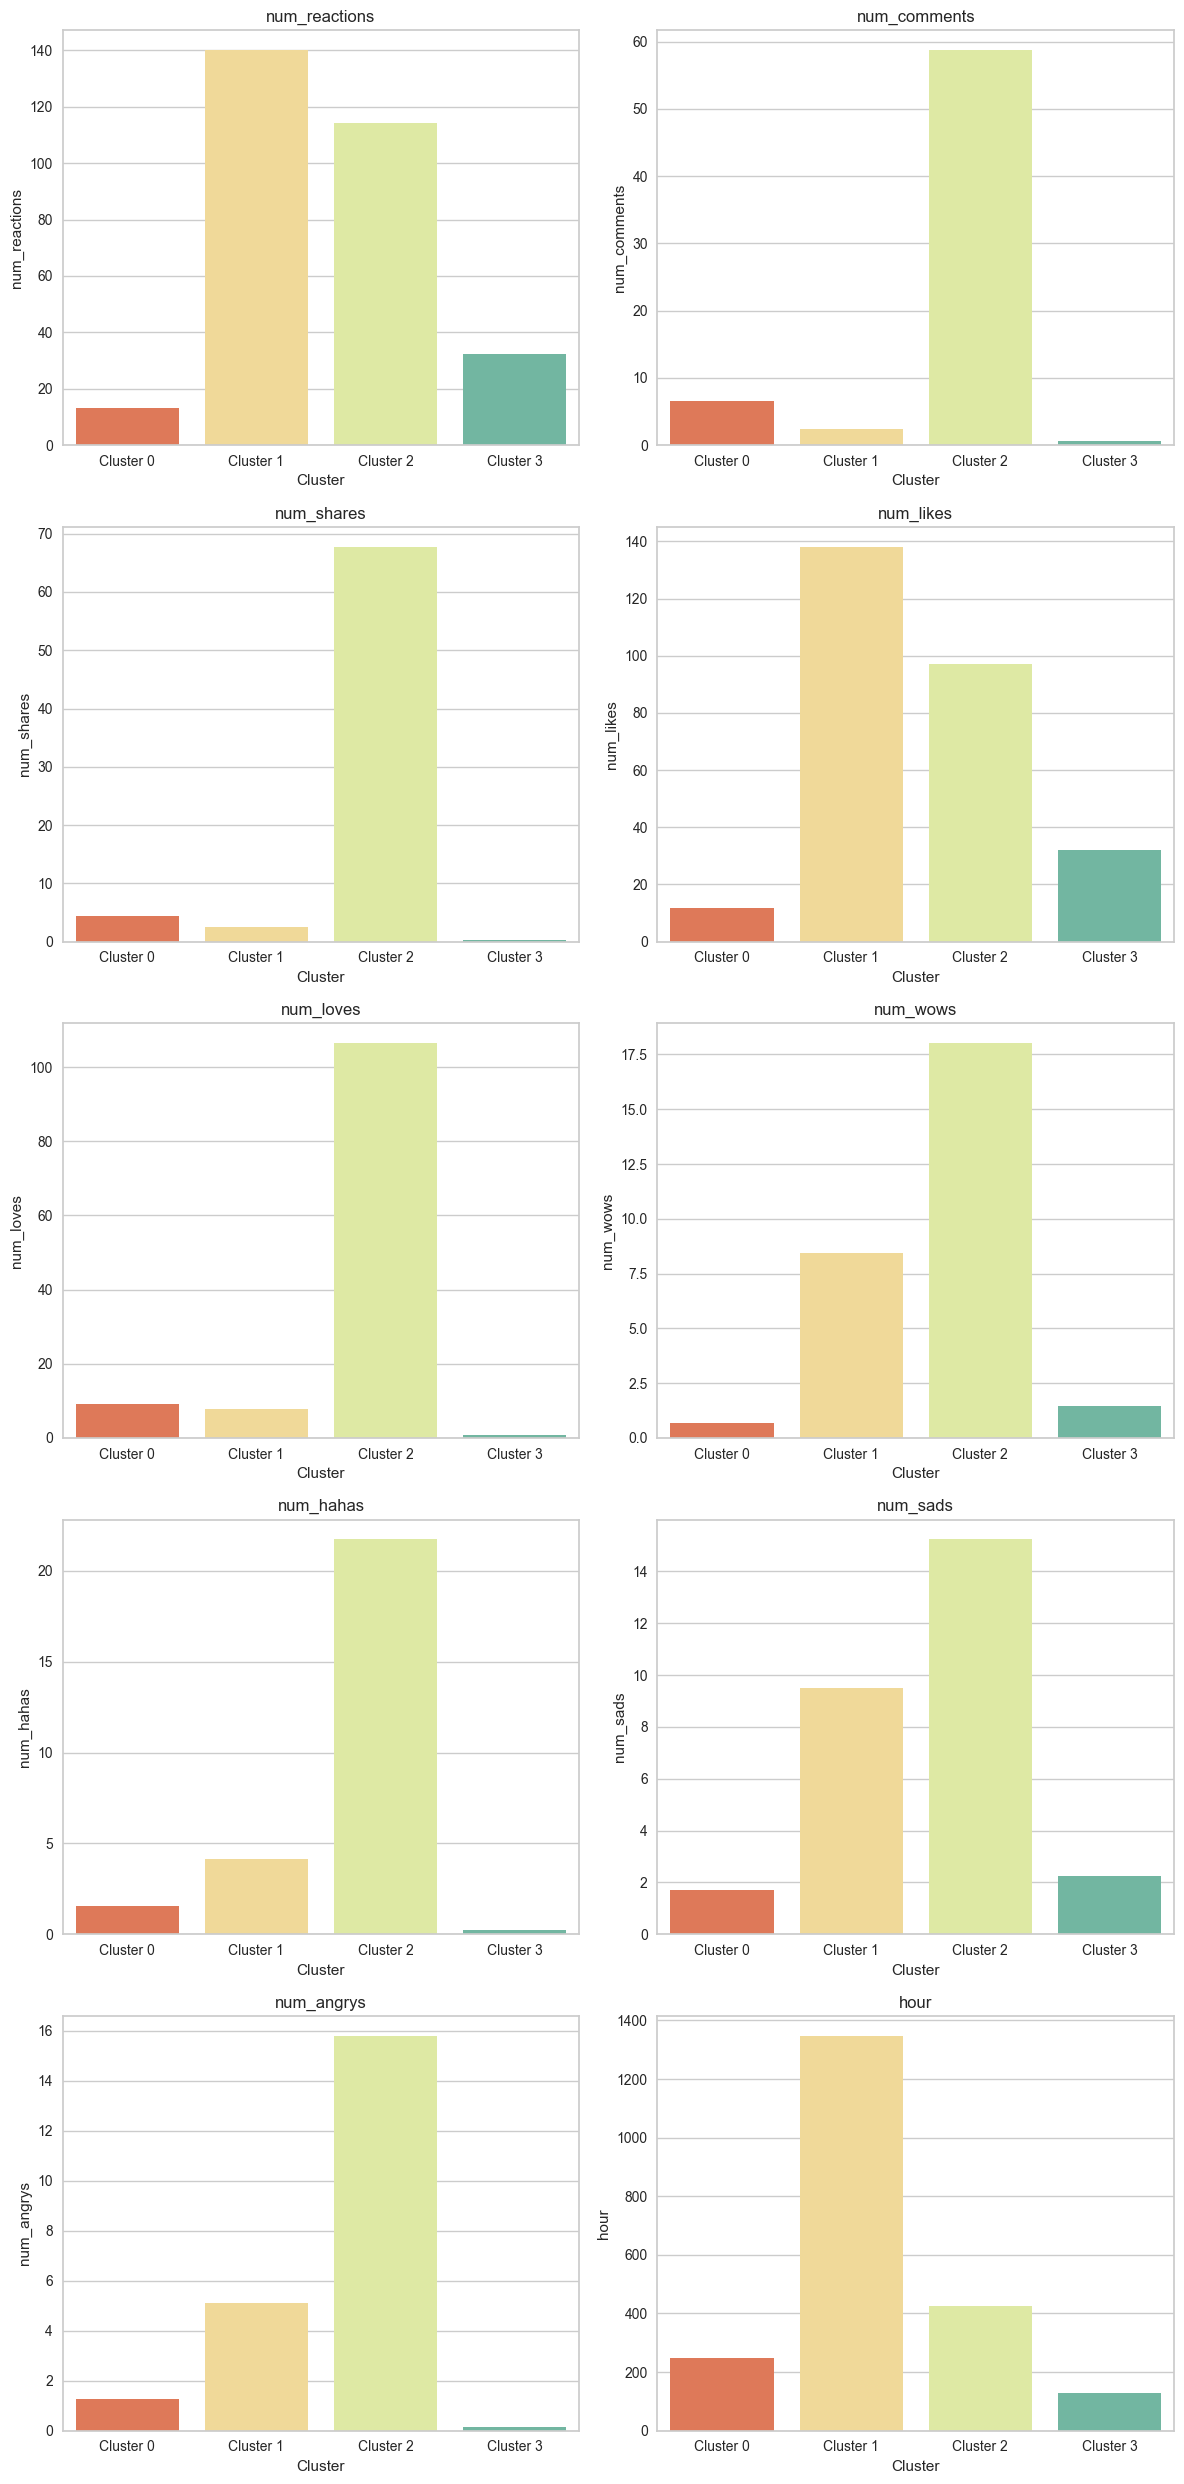

In [188]:
plot_variables(sum_groups, NUM_VARS+["hour"])

In [189]:
joblib.dump(facebook_pipe, '../src/facebook_clustering_pipeline.joblib')

['../src/facebook_clustering_pipeline.joblib']

# Save models

In [191]:
joblib.dump(price_pipe, './Output/precio_casas_pipeline.joblib')